In [1]:
#cargar datos a panda para manejo de datos
#cargar datos a numpy y a matplot
#procura dar nombres cortos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
# shift+enter para procesar imformación de esta celda


In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('veracruz2.txt', skiprows=4, sep='\s+')
# "Shift + Enter"


In [3]:
# Lee los primeros 5 renglones del archivo
# puedes elegir el número de renglones a leer, este deberá ir dentro del parentesis
#que acompaña al comando "df0.head()", si no especificas, por default tendrás 
#5 renglones
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2018,17:00,354,344,6.34,14.0,13.4,98,852.1,0.0,201.7
1,26/01/2018,18:00,342,338,7.88,15.3,12.5,100,851.3,0.0,123.2
2,26/01/2018,19:00,10,357,3.87,13.1,12.3,100,850.7,0.0,126.2
3,26/01/2018,20:00,10,359,4.38,13.6,12.8,100,849.7,0.0,151.2
4,26/01/2018,21:00,18,356,4.89,11.9,12.2,100,849.2,0.2,75.7


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,354,344,6.34,14.0,13.4,98,852.1,0.0,201.7,2018-01-26 17:00:00
1,342,338,7.88,15.3,12.5,100,851.3,0.0,123.2,2018-01-26 18:00:00
2,10,357,3.87,13.1,12.3,100,850.7,0.0,126.2,2018-01-26 19:00:00
3,10,359,4.38,13.6,12.8,100,849.7,0.0,151.2,2018-01-26 20:00:00
4,18,356,4.89,11.9,12.2,100,849.2,0.2,75.7,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,175.048485,265.593939,3.401333,10.003636,9.957576,94.775758,851.640606,0.935758,105.226667
std,133.732843,105.569761,2.493261,6.068802,4.438209,12.471114,2.999591,2.349778,199.403468
min,0.000000,25.000000,0.140000,2.400000,0.900000,41.000000,847.400000,0.000000,0.000000
25%,24.000000,216.000000,1.380000,5.000000,6.200000,98.000000,849.400000,0.000000,0.000000
50%,194.000000,319.000000,2.570000,8.100000,10.200000,100.000000,850.700000,0.000000,0.000000
75%,309.000000,358.000000,4.970000,14.200000,12.300000,100.000000,853.400000,0.000000,122.000000
max,358.000000,360.000000,12.450000,27.500000,23.900000,100.000000,859.200000,12.800000,881.300000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 0] 
df_select = df_tmp[df_tmp.TEMP < 5]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
87,224,252,2.30,7.5,4.4,100,856.7,0.0,0.0,2018-01-30 08:00:00
88,305,236,1.16,4.5,4.0,100,855.9,0.0,0.0,2018-01-30 09:00:00
89,219,228,2.46,6.0,2.8,100,855.6,0.0,0.0,2018-01-30 10:00:00
90,297,229,1.69,5.1,1.9,100,855.8,0.2,0.0,2018-01-30 11:00:00
91,45,223,0.78,4.8,1.2,100,856.3,0.0,0.0,2018-01-30 12:00:00
92,336,360,1.04,8.9,0.9,100,856.6,0.0,22.3,2018-01-30 13:00:00
93,21,359,0.65,10.8,3.6,99,856.8,0.0,167.3,2018-01-30 14:00:00
114,220,294,0.50,3.5,4.1,100,850.5,0.0,0.0,2018-01-31 11:00:00
115,203,210,2.22,4.5,2.9,100,850.5,0.0,0.0,2018-01-31 12:00:00
116,200,356,1.27,4.7,2.5,100,850.8,0.0,10.5,2018-01-31 13:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()


DIRS      175.048485
DIRR      265.593939
VELS        3.401333
VELR       10.003636
TEMP        9.957576
HR         94.775758
PB        851.640606
PREC        0.935758
RADSOL    105.226667
dtype: float64

In [11]:
df.TEMP.mean()

9.957575757575762

In [12]:
#recuerda que cambiaste el plt por mpl al inicio.

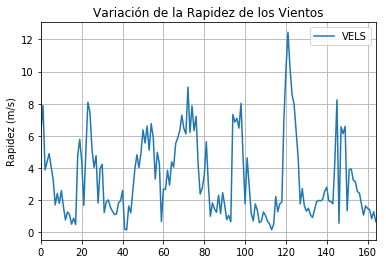

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
mpl.figure(); df.VELS.plot(); mpl.legend(loc='best')
mpl.title("Variación de la Rapidez de los Vientos")
mpl.ylabel("Rapidez (m/s)")
mpl.grid(True)#esto nos permite poner la cuadrícula
mpl.show()

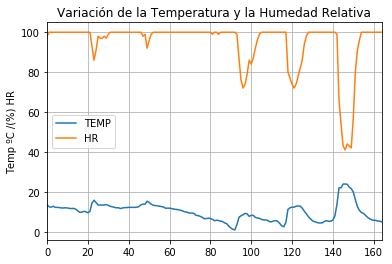

In [14]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
mpl.figure(); df1.plot(); mpl.legend(loc='best')
mpl.title("Variación de la Temperatura y la Humedad Relativa")
mpl.ylabel("Temp ºC /(%) HR")
mpl.grid(True)
mpl.show()

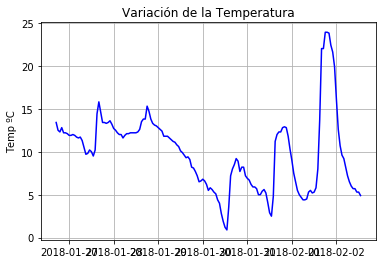

In [27]:
mpl.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
mpl.title("Variación de la Temperatura")
mpl.ylabel("Temp ºC")
mpl.grid(True)
mpl.show()

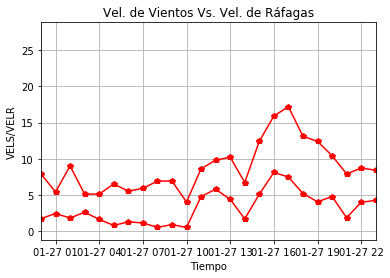

In [32]:
df2 = df[['VELS','VELR']]
mpl.plot_date(x=df.FECHA, y=df2, fmt="rp-")
mpl.xlim( '27/01/2018 00:00', '27/01/2018 23:00')
mpl.title("Vel. de Vientos Vs. Vel. de Ráfagas")
mpl.ylabel("VELS/VELR")
mpl.xlabel("Tiempo")
mpl.grid(True)
mpl.show()

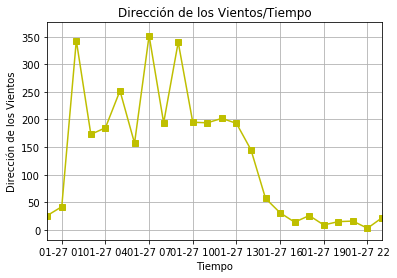

In [17]:
mpl.plot_date(x=df.FECHA, y=df.DIRS, fmt="ys-")
mpl.xlim( '27/01/2018 00:00', '27/01/2018 23:00')
mpl.title("Dirección de los Vientos/Tiempo")
mpl.ylabel("Dirección de los Vientos")
mpl.xlabel("Tiempo")
mpl.grid(True)
mpl.show()

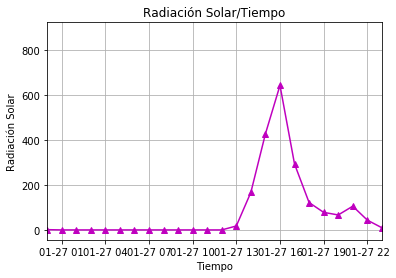

In [18]:
mpl.plot_date(x=df.FECHA, y=df.RADSOL , fmt=("m^-"))
mpl.xlim( '27/01/2018 00:00', '27/01/2018 23:00')
mpl.title("Radiación Solar/Tiempo")
mpl.ylabel("Radiación Solar")
mpl.xlabel("Tiempo")
mpl.grid(True)
mpl.show()

In [19]:
df.TEMP.describe()

count    165.000000
mean       9.957576
std        4.438209
min        0.900000
25%        6.200000
50%       10.200000
75%       12.300000
max       23.900000
Name: TEMP, dtype: float64

In [20]:
df.TEMP.max()-df.TEMP.min()

23.0

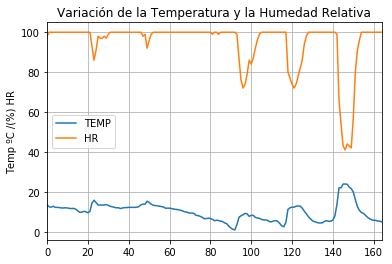

In [26]:
df4 = df[['TEMP','HR']]
mpl.figure(); df4.plot(); mpl.legend(loc='best',fmt=)
mpl.title("Variación de la Temperatura y la Humedad Relativa")
mpl.ylabel("Temp ºC /(%) HR")
mpl.grid(True)
mpl.show()

In [33]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,175.048485,265.593939,3.401333,10.003636,9.957576,94.775758,851.640606,0.935758,105.226667
std,133.732843,105.569761,2.493261,6.068802,4.438209,12.471114,2.999591,2.349778,199.403468
min,0.000000,25.000000,0.140000,2.400000,0.900000,41.000000,847.400000,0.000000,0.000000
25%,24.000000,216.000000,1.380000,5.000000,6.200000,98.000000,849.400000,0.000000,0.000000
50%,194.000000,319.000000,2.570000,8.100000,10.200000,100.000000,850.700000,0.000000,0.000000
75%,309.000000,358.000000,4.970000,14.200000,12.300000,100.000000,853.400000,0.000000,122.000000
max,358.000000,360.000000,12.450000,27.500000,23.900000,100.000000,859.200000,12.800000,881.300000
